# ドル円レート 週足 メジアン統計

In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import seaborn as sns
import yfinance as yf

code = 'USDJPY=X'
symbol = code
ticker = yf.Ticker(symbol)
df = ticker.history(period='3y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-21 00:00:00+00:00,119.261002,122.349998,119.099998,122.070000,0,0.0,0.0
2022-03-28 00:00:00+01:00,122.269997,125.055000,121.291000,122.402000,0,0.0,0.0
2022-04-04 00:00:00+01:00,122.610001,124.650002,122.288002,124.285004,0,0.0,0.0
2022-04-11 00:00:00+01:00,124.385002,126.670998,124.302002,126.410004,0,0.0,0.0
2022-04-18 00:00:00+01:00,126.617996,129.373993,126.263000,128.320999,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-17 00:00:00+00:00,152.022995,152.298004,149.130005,149.229996,0,0.0,0.0
2025-02-24 00:00:00+00:00,149.386993,150.964996,148.595993,150.613998,0,0.0,0.0
2025-03-03 00:00:00+00:00,150.770996,151.298996,146.990005,148.029999,0,0.0,0.0


In [2]:
df0 = ticker.history(period='5y', interval='1wk')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-16 00:00:00+00:00,110.990997,110.990997,110.990997,110.990997,0,0.0,0.0
2020-03-23 00:00:00+00:00,110.403999,111.667999,107.884003,107.910004,0,0.0,0.0
2020-03-30 00:00:00+01:00,107.439003,108.711998,107.028999,108.400002,0,0.0,0.0
2020-04-06 00:00:00+01:00,108.679001,109.352997,108.329002,108.365997,0,0.0,0.0
2020-04-13 00:00:00+01:00,108.349998,108.371002,106.930000,107.550003,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-17 00:00:00+00:00,152.022995,152.298004,149.130005,149.229996,0,0.0,0.0
2025-02-24 00:00:00+00:00,149.386993,150.964996,148.595993,150.613998,0,0.0,0.0
2025-03-03 00:00:00+00:00,150.770996,151.298996,146.990005,148.029999,0,0.0,0.0


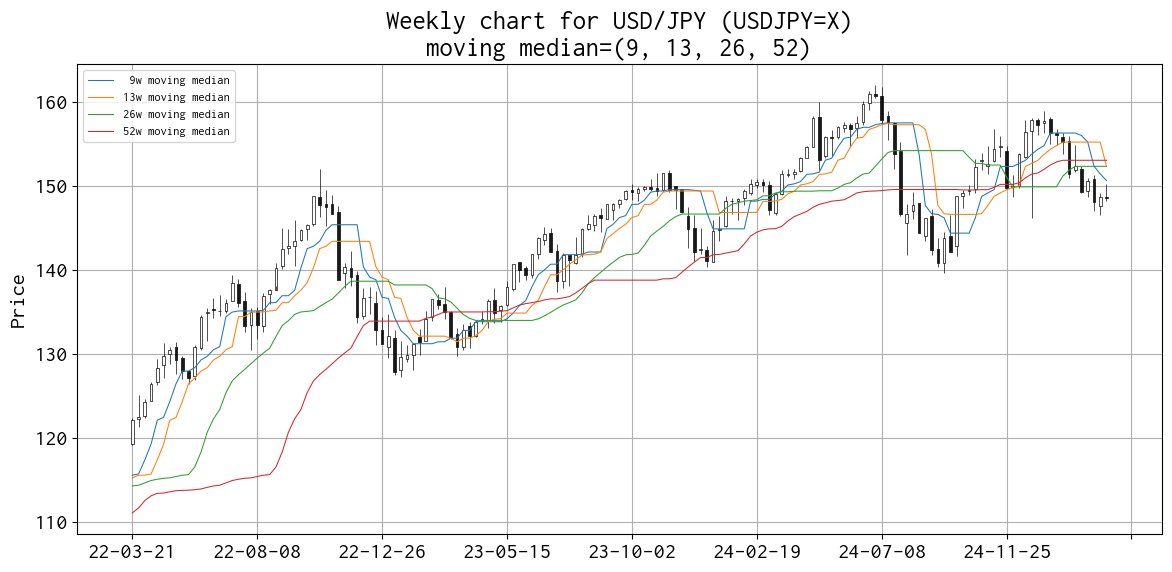

In [3]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

mm09 = df0['Close'].rolling(9).median()
mm13 = df0['Close'].rolling(13).median()
mm26 = df0['Close'].rolling(26).median()
mm52 = df0['Close'].rolling(52).median()
apds  = [
    mpf.make_addplot(mm09[df.index], width=0.75, label=' 9w moving median', ax=ax),
    mpf.make_addplot(mm13[df.index], width=0.75, label='13w moving median', ax=ax),
    mpf.make_addplot(mm26[df.index], width=0.75, label='26w moving median', ax=ax),
    mpf.make_addplot(mm52[df.index], width=0.75, label='52w moving median', ax=ax),
]   

mpf.plot(
    df, type='candle', style='default',
    volume=False,
    datetime_format='%y-%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax,
)
ax.set_title('Weekly chart for %s (%s)\nmoving median=(9, 13, 26, 52)' % (ticker.info['longName'], symbol))

ax.legend(loc='best', fontsize=9)
ax.grid()

plt.tight_layout()
plt.savefig('report_weekly_chart_robust_%s.png' % code)
plt.show()

In [4]:
df.tail(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-17 00:00:00+00:00,148.598007,150.141998,148.179993,148.490005,0,0.0,0.0


In [5]:
df.tail(2)['Close']

Date
2025-03-10 00:00:00+00:00    148.619995
2025-03-17 00:00:00+00:00    148.490005
Name: Close, dtype: float64

In [6]:
df.tail(2)['Close'].diff()

Date
2025-03-10 00:00:00+00:00        NaN
2025-03-17 00:00:00+00:00   -0.12999
Name: Close, dtype: float64

In [7]:
df['Close'].rolling(9).median().tail(1)

Date
2025-03-17 00:00:00+00:00    150.613998
Name: Close, dtype: float64

In [8]:
df['Close'].rolling(13).median().tail(1)

Date
2025-03-17 00:00:00+00:00    152.330002
Name: Close, dtype: float64

In [9]:
df['Close'].rolling(26).median().tail(1)

Date
2025-03-17 00:00:00+00:00    152.305
Name: Close, dtype: float64

In [10]:
df['Close'].rolling(52).median().tail(1)

Date
2025-03-17 00:00:00+00:00    153.024994
Name: Close, dtype: float64

## ヒストグラム

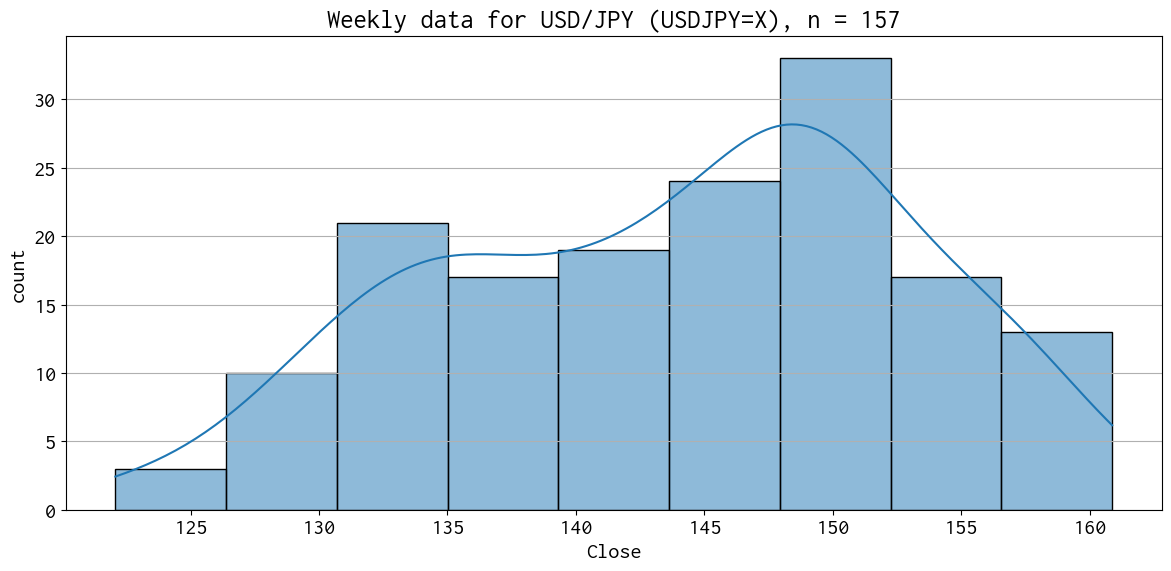

In [11]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

sns.histplot(
    df['Close'],
    kde=True,
    ax=ax
)

ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('Weekly data for %s (%s), n = %d' % (ticker.info['longName'], symbol, len(df)))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('report_weekly_histogram_%s.png' % code)
plt.show()